<a href="https://colab.research.google.com/github/huyhoait203/design-pattern/blob/master/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# !cp /content/spark-3.1.1-bin-hadoop3.2.tgz .
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
! echo $JAVA_HOME

/usr/lib/jvm/java-8-openjdk-amd64


In [ ]:
import findspark
findspark.init()

In [ ]:
import os
from pyspark import SparkContext
import matplotlib.pyplot as plt


# Câu 1 : f1


In [23]:
def f1(logFile : str):
  sc = SparkContext.getOrCreate()
  rdd = sc.textFile(logFile).cache()
  header = rdd.first()
  data = rdd.filter(lambda line: line != header) \
            .map(lambda line: line.split(","))
  rdd_1 = data.map(lambda tran: tran[2])\
              .distinct()\
              .sortBy(lambda item: item.lower())

  start_last_10_item = rdd_1.count() - 10
  last_10_items =  rdd_1.zipWithIndex()\
                          .filter(lambda x : x[1] >= start_last_10_item)\
                          .map(lambda x : x[0])

  print("--------------------10 món hàng đầu tiên--------------------")
  for i in rdd_1.take(10):
    print(i)

  print("--------------------10 món hàng cuối cùng--------------------")
  for i in last_10_items.collect():
      print(i)

  basket_folder = "/content/f1/"

  if os.path.exists(basket_folder):
        for file in os.listdir(basket_folder):
            file_path = os.path.join(basket_folder, file)
            try:
                if os.path.isfile(file_path):
                    os.unlink(file_path)
            except Exception as e:
                print(e)
        try:
            os.rmdir(basket_folder)
        except Exception as e:
            print(e)
  rdd_1.saveAsTextFile(basket_folder)
f1("/content/baskets.csv")

--------------------10 món hàng đầu tiên--------------------
abrasive cleaner
artif. sweetener
baby cosmetics
bags
baking powder
bathroom cleaner
beef
berries
beverages
bottled beer
--------------------10 món hàng cuối cùng--------------------
UHT-milk
vinegar
waffles
whipped/sour cream
whisky
white bread
white wine
whole milk
yogurt
zwieback


# Câu 1 : f2


('whole milk', 2502)
('other vegetables', 1898)
('rolls/buns', 1716)
('soda', 1514)
('yogurt', 1334)
('root vegetables', 1071)
('tropical fruit', 1032)
('bottled water', 933)
('sausage', 924)
('citrus fruit', 812)


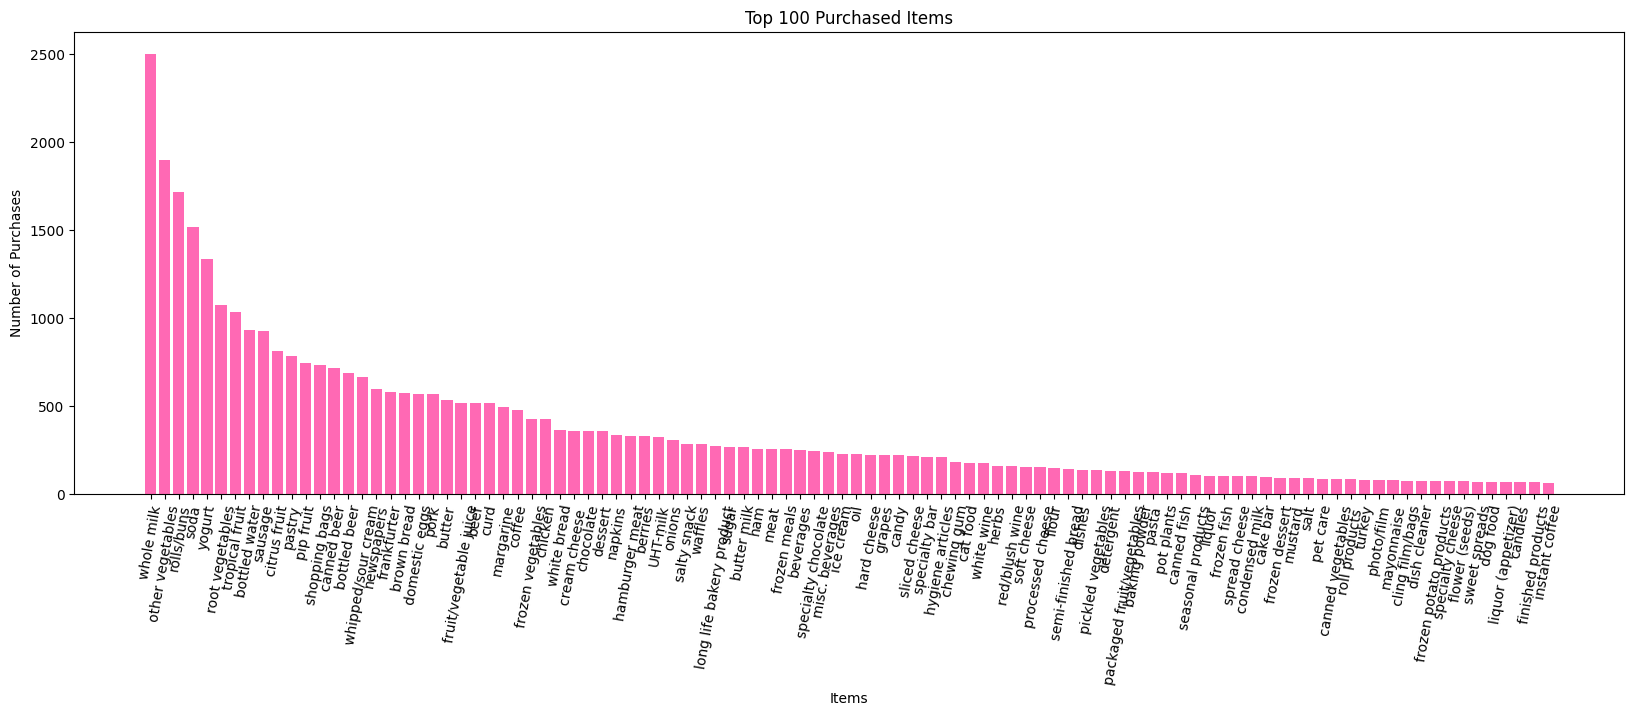

In [24]:
def f2(logFile : str):
  sc = SparkContext.getOrCreate()
  rdd = sc.textFile(logFile).cache()
  header = rdd.first()
  data =  rdd.filter(lambda line : line != header) \
              .map(lambda line : line.split(","))
  rdd2 =   data.map(lambda tran : tran[2]) \
                .map(lambda x : (x,1))\
                .reduceByKey(lambda x, y: x + y)\
                .sortBy(lambda x : x[1] ,  ascending=False)

  res = [print(i) for i in rdd2.take(10)]

  output_f2 = "/content/f2/"
  if os.path.exists(output_f2):
        for file in os.listdir(output_f2):
            file_path = os.path.join(output_f2, file)
            try:
                if os.path.isfile(file_path):
                    os.unlink(file_path)
            except Exception as e:
                print(e)
        try:
            os.rmdir(output_f2)
        except Exception as e:
            print(e)
  rdd2.saveAsTextFile(output_f2)

  top_items = rdd2.take(100)
  items = [item[0] for item in top_items]
  counts = [item[1] for item in top_items]
  plt.figure(figsize=(20, 6))
  plt.bar(items, counts,  color='#FF69B4')
  plt.ylabel('Number of Purchases')
  plt.xlabel('Items')
  plt.title('Top 100 Purchased Items')
  plt.xticks(rotation=80)
  plt.show()

f2("/content/baskets.csv")

#Câu 1: f3

('1379', 11)
('3737', 11)
('2271', 11)
('4338', 11)
('2193', 11)
('4376', 10)
('1052', 10)
('1574', 10)
('1275', 10)
('1908', 10)
('3289', 10)
('3120', 10)
('3180', 10)
('2394', 10)
('4217', 10)
('2524', 10)
('4864', 10)
('3872', 10)
('3484', 10)
('3082', 10)
('3915', 10)
('3248', 10)
('1410', 10)
('3593', 10)
('2625', 10)
('1793', 10)
('1922', 9)
('4364', 9)
('4933', 9)
('2760', 9)
('3830', 9)
('1827', 9)
('3462', 9)
('1169', 9)
('2294', 9)
('3361', 9)
('2851', 9)
('3221', 9)
('4303', 9)
('2663', 9)
('3090', 9)
('1566', 9)
('3465', 9)
('4494', 9)
('2440', 9)
('2758', 9)
('1905', 9)
('2164', 9)
('1878', 9)
('4656', 9)
('4683', 9)
('1136', 9)
('1932', 9)
('1998', 9)
('4941', 9)
('1087', 9)
('2517', 9)
('1466', 9)
('3050', 9)
('2960', 9)
('4437', 9)
('2070', 9)
('2990', 9)
('3122', 9)
('3308', 9)
('1991', 9)
('4272', 9)
('3402', 9)
('1654', 9)
('2632', 9)
('4137', 9)
('4190', 9)
('4526', 9)
('4695', 9)
('3942', 8)
('1248', 8)
('1870', 8)
('3761', 8)
('1004', 8)
('2051', 8)
('4721', 8)
('

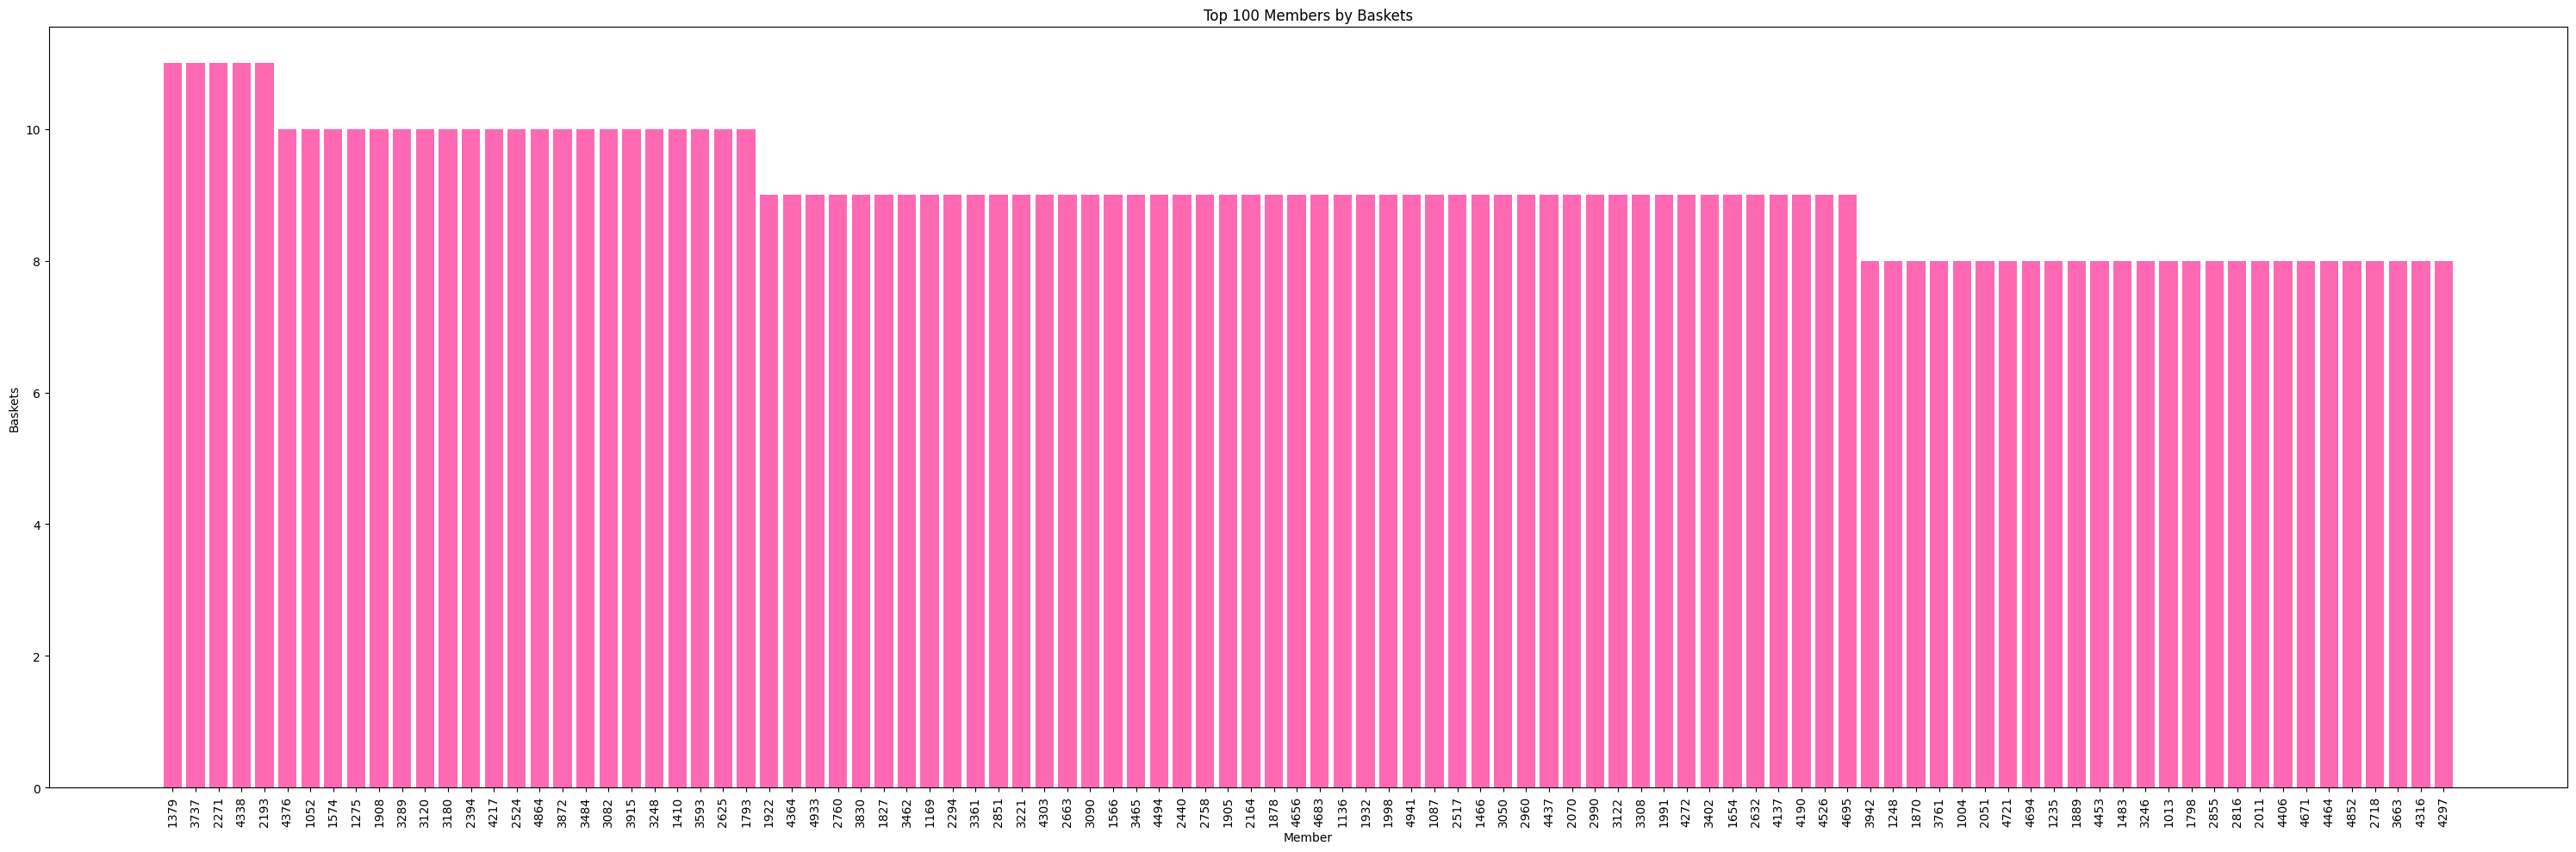

In [25]:
def f3(logFile: str):
    output_f3 = "/content/f3/"
    sc = SparkContext.getOrCreate()
    rdd = sc.textFile(logFile)
    header = rdd.first()
    rdd = rdd.filter(lambda line: line != header)

    baskets = rdd.map(lambda line: ((line.split(',')[0], line.split(',')[1]), 1)).distinct()

    basket_counts = baskets.map(lambda x: (x[0][0], 1)).reduceByKey(lambda x, y: x + y)

    sorted_basket_counts = basket_counts.sortBy(lambda x: x[1], ascending=False)

    top_100_members = sorted_basket_counts.take(100)

    member_names = [member for member, _ in top_100_members]

    basket_counts = [count for _, count in top_100_members]

    if os.path.exists(output_f3):
      for file in os.listdir(output_f3):
          file_path = os.path.join(output_f3, file)
          try:
              if os.path.isfile(file_path):
                  os.unlink(file_path)
          except Exception as e:
              print(e)
      try:
          os.rmdir(output_f3)
      except Exception as e:
          print(e)

    top_100_members_rdd = sc.parallelize(top_100_members)
    top_100_members_rdd.saveAsTextFile(output_f3)

    res = [print(i) for i in top_100_members]

    x_label = "Member"
    y_label = "Baskets"
    title = "Top 100 Members by Baskets"

    plt.figure(figsize=(30, 10))
    plt.bar(member_names, basket_counts, color='#FF69B4')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

f3("/content/baskets.csv")


#Câu 1: f4

In [26]:
def f4(logFile: str):
    output_f4 = "/content/f4/"
    output_f4_max_products_by_a_member = "/content/f4/max_products_by_a_member/"
    output_f4_max_products_by_most_members = "/content/f4/max_products_by_most_members/"

    sc = SparkContext.getOrCreate()
    rdd = sc.textFile(logFile)
    header = rdd.first()
    rdd = rdd.filter(lambda line: line != header)

    # Tìm số lượng món hàng phân biệt mỗi người dùng đã mua
    member_product_counts = rdd.map(lambda line: (line.split(',')[0], line.split(',')[2])).distinct().map(lambda x: (x[0], 1)).reduceByKey(lambda x, y: x + y)

    # Tìm người dùng mua nhiều món hàng phân biệt nhất
    max_products_by_a_member = member_product_counts.max(lambda x: x[1])

    print("Người dùng mua số lượng sản phẩm phân biệt nhiều nhất:")
    print("Mã số người dùng:", max_products_by_a_member[0])
    print("Số lượng món hàng:", max_products_by_a_member[1])

    # Tìm số lượng người dùng mỗi món hàng được mua
    product_member_counts = rdd.map(lambda line: (line.split(',')[2], line.split(',')[0])).distinct().map(lambda x: (x[0], 1)).reduceByKey(lambda x, y: x + y)

    # Tìm món hàng được mua bởi nhiều người dùng nhất
    max_products_by_most_members = product_member_counts.max(lambda x: x[1])

    print("\nMón hàng được mua bởi nhiều người dùng nhất:")
    print("Tên món hàng:", max_products_by_most_members[0])
    print("Số lượng người mua:", max_products_by_most_members[1])

    # Xóa thư mục và file trong thư mục đầu ra nếu tồn tại
    for directory in [output_f4_max_products_by_most_members, output_f4_max_products_by_a_member, output_f4]:
        if os.path.exists(directory):
            for file in os.listdir(directory):
                file_path = os.path.join(directory, file)
                try:
                    if os.path.isfile(file_path):
                        os.unlink(file_path)
                except Exception as e:
                    print(e)
            try:
                os.rmdir(directory)
            except Exception as e:
                print(e)

    # Lưu kết quả vào các thư mục đầu ra tương ứng
    max_products_by_a_member_rdd = sc.parallelize([(max_products_by_a_member[0], max_products_by_a_member[1])])
    max_products_by_most_members_rdd = sc.parallelize([(max_products_by_most_members[0], max_products_by_most_members[1])])

    max_products_by_a_member_rdd.saveAsTextFile(output_f4_max_products_by_a_member)
    max_products_by_most_members_rdd.saveAsTextFile(output_f4_max_products_by_most_members)

f4("/content/baskets.csv")


Người dùng mua số lượng sản phẩm phân biệt nhiều nhất:
Mã số người dùng: 2051
Số lượng món hàng: 26

Món hàng được mua bởi nhiều người dùng nhất:
Tên món hàng: whole milk
Số lượng người mua: 1786


# Câu 2: Dataframe


In [ ]:
from pyspark.sql import SQLContext
from pyspark.ml.fpm import FPGrowth
from pyspark import SparkContext
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import os
from pyspark.sql.functions import col, collect_set, year, month, dayofmonth,concat_ws , explode


+-------------+----------+-------------------------------------------------+
|Member_number|Date      |basket                                           |
+-------------+----------+-------------------------------------------------+
|3942         |01/01/2014|[yogurt, Instant food products, other vegetables]|
|3681         |01/01/2014|[dishes, onions, whipped/sour cream]             |
|2974         |01/01/2014|[bottled water, berries, whipped/sour cream]     |
|1659         |01/01/2014|[specialty chocolate, frozen vegetables]         |
|1249         |01/01/2014|[citrus fruit, coffee]                           |
|2727         |01/01/2014|[hamburger meat, frozen potato products]         |
+-------------+----------+-------------------------------------------------+
only showing top 6 rows

+----------+-----+
|      Date|count|
+----------+-----+
|01/01/2014|   21|
|01/01/2015|   16|
|01/02/2014|   25|
|01/02/2015|   13|
|01/03/2014|   21|
|01/03/2015|   20|
|01/04/2014|   17|
|01/04/2015|   

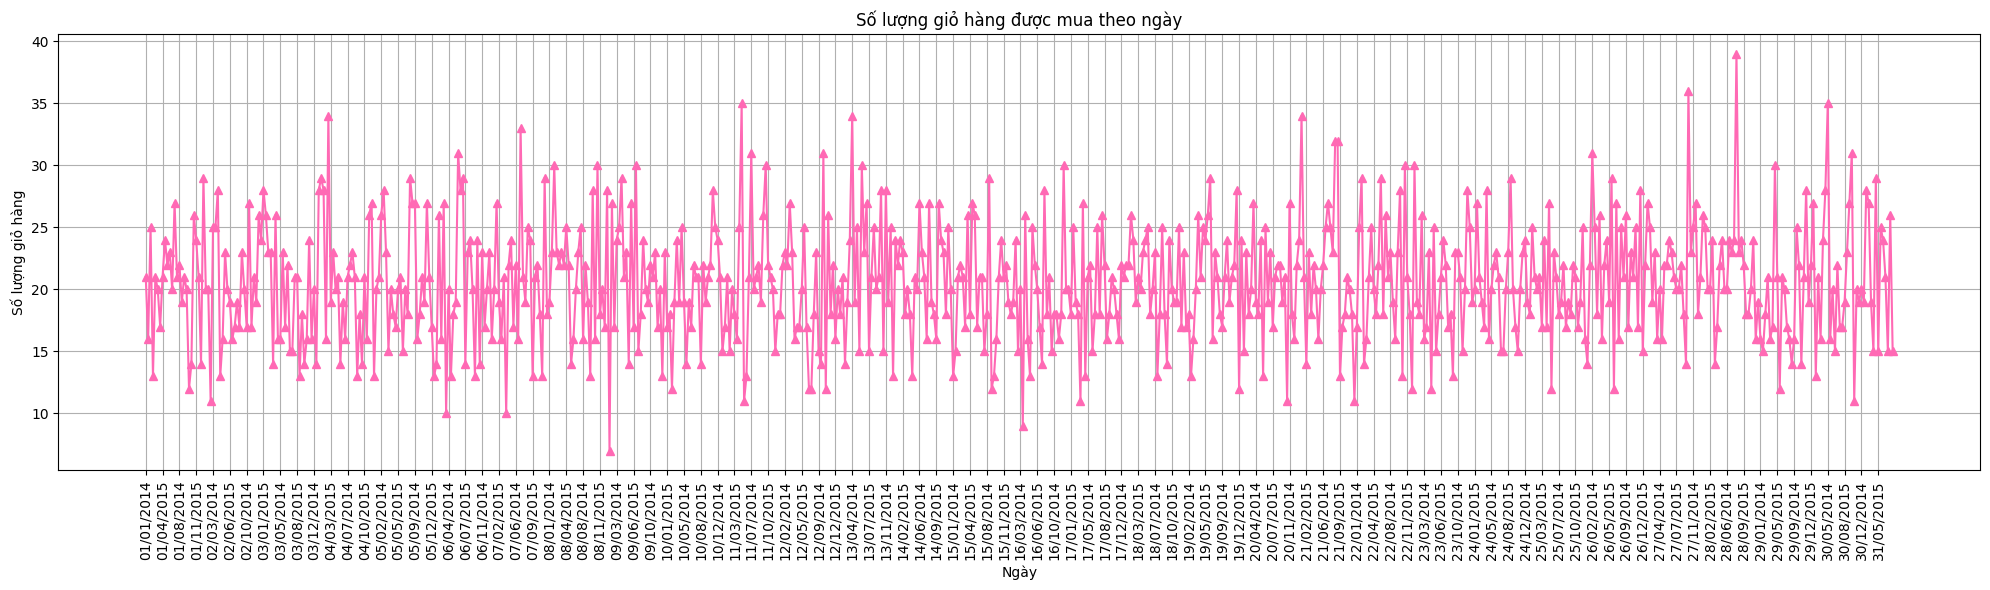

In [ ]:
sc = SparkContext.getOrCreate()
sqlc = SQLContext(sc)
df = sqlc.read.csv('/content/baskets.csv' , header=True, inferSchema=True)
req22_1 = df.groupBy("Member_number", "Date")\
            .agg(collect_set("itemDescription")\
            .alias("basket"))\
            .orderBy("Date")
req22_1.show(6,truncate =False)

req22_2 = req22_1.groupBy("Date")\
                  .count()\
                  .orderBy("Date")
req22_2.show()
dates = req22_2.select("Date").rdd.flatMap(lambda x : x ).collect()
counts = req22_2.select("count").rdd.flatMap(lambda x : x ).collect()

# daily_baskets_count_pd = req22_2.toPandas()

plt.figure(figsize=(20, 6))
# plt.plot(daily_baskets_count_pd["Date"], daily_baskets_count_pd["count"], marker='o')
plt.plot(dates , counts , marker = '^' , color='#FF69B4')
plt.title('Số lượng giỏ hàng được mua theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng giỏ hàng')
plt.xticks(dates[::7] , rotation=90)
plt.grid(True)
plt.tight_layout()

# # Hiển thị biểu đồ
plt.show()

baskets_df = req22_1.withColumn("basket", concat_ws(",", "basket"))\
                    .select("basket")
baskets_df.coalesce(1).write.mode("overwrite").csv("/baskets/" , header=True)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode, split, lit, array, when, concat , lit ,  struct, col , coalesce , explode
from itertools import combinations
from pyspark.sql import Row
from pyspark.sql.functions import count as sql_count


class PCY:
    def __init__(self, data_source, s, c):
        self.data_source = data_source
        self.s = s
        self.c = c
        self.frequent_items = set()
        self.frequent_buckets = []

    def generate_pairs(self, items):
        return list(combinations(items, 2))

    def hash_pair(self, pair):
        return hash((pair[0], pair[1]))

    def calculate_support_and_confidence(self , itemset, frequent_itemsets):
      antecedent = itemset[0][:-1]
      consequent = itemset[0][-1]
      freq = itemset[1]

      total_transactions = sum([item[1] for item in frequent_itemsets])
      support = freq / total_transactions

      if len(antecedent) > 0:
          antecedent_str = antecedent
          confidence = freq / [item[1] for item in frequent_itemsets if item[0] == antecedent][0]
      else:
          antecedent_str = None
          confidence = None

      return (antecedent_str, consequent, confidence, support)

    def run(self):
        spark = SparkSession.builder.master("local").appName("PCY").getOrCreate()
        try:
            # Load data
            data = spark.read.csv(self.data_source, header=True, inferSchema=True)
            data_counts = data.count()

            #======PASS_1=======#

            # Count occurrences of each item
            item_counts = data.select(explode(split(col("basket"), ","))\
                                      .alias("item")).groupBy("item")\
                                      .agg(sql_count("*").alias("item_count_1"))


            # Filter frequent items
            frequent_items_df = item_counts.filter(item_counts['item_count_1'] / data_counts >= self.s)
            frequent_items_df_array = frequent_items_df.withColumn("item", split(frequent_items_df["item"], ", "))

            # Collect frequent items
            self.frequent_items = set(frequent_items_df.select("item").rdd.flatMap(lambda x: x).collect())

            # Hashing pairs and counting pairs
            pairs = data.rdd.flatMap(lambda x: self.generate_pairs(x['basket'].split(','))) \
                            .map(lambda pair: (self.hash_pair(pair), 1)) \
                            .reduceByKey(lambda x, y: x + y)

            # Filter frequent buckets
            self.frequent_buckets = set(pairs.filter(lambda x: x[1] / data_counts >= self.s).map(lambda x: x[0]).collect())

            #======PASS_2=======#

            # Generate candidate pairs
            candidate_pairs = data.rdd.flatMap(lambda x: self.generate_pairs(x['basket'].split(','))) \
                                      .filter(lambda pair: pair[0] in self.frequent_items and pair[1] in self.frequent_items)\
                                      .filter(lambda pair: self.hash_pair(pair) in self.frequent_buckets)\
                                      .map(lambda pair: (pair, 1)) \
                                      .groupByKey() \
                                      .mapValues(lambda x: sum(x))

            candidate_pairs_df = candidate_pairs.toDF(["item", "item_count_2"])
            candidate_pairs_df_array = candidate_pairs_df.withColumn("item", array(col("item._1"), col("item._2")))

            # Join candidate_pairs_df_array and frequent_items_df_array
            combined_df = frequent_items_df_array.join(candidate_pairs_df_array, on="item", how="full_outer") \
                                                  .withColumn("item_count", coalesce(frequent_items_df_array["item_count_1"], candidate_pairs_df_array["item_count_2"])) \
                                                  .select("item" , "item_count")
            combined_df.show()
            combined_df1 = combined_df.withColumn("item", concat_ws(",", "item"))\
                    .select("*")
            combined_df1.coalesce(1).write.mode("overwrite").csv("pcy_frequent_pairs.csv" , header=True)

            frequent_itemsets = combined_df.rdd.map(lambda row: (row.item, row.item_count)).collect()
            combined_rdd = combined_df.rdd
            result_rdd = combined_rdd.map(lambda x: self.calculate_support_and_confidence(x, frequent_itemsets))
            result_rdd = result_rdd.filter(lambda x: x[0] is not None)
            df_res = spark.createDataFrame(result_rdd, schema=["antecedent", "consequent", "confidence", "support"])
            df_res.show()
            df_res_1 = df_res.withColumn("antecedent", concat_ws(",", "antecedent"))\
                    .select("*")
            df_res_1.coalesce(1).write.mode("overwrite").csv("pcy_association_rules.csv" , header=True)
        finally:
            spark.stop()

if __name__ == "__main__":
    pcy = PCY("/baskets/", s=0.01, c=0.02)
    pcy.run()


+--------------------+----------+
|                item|item_count|
+--------------------+----------+
|         [beverages]|       248|
|          [cat food]|       177|
|    [red/blush wine]|       157|
|           [napkins]|       331|
|              [meat]|       252|
| [frozen vegetables]|       419|
|        [white wine]|       175|
|       [frankfurter]|       565|
|     [cream cheese ]|       314|
|  [hygiene articles]|       205|
|[long life bakery...|       268|
|  [whole milk, soda]|       174|
|[whipped/sour cream]|       654|
|            [yogurt]|      1285|
|       [canned beer]|       702|
|       [soft cheese]|       150|
|[whole milk, othe...|       222|
|    [tropical fruit]|      1014|
|              [curd]|       504|
|            [grapes]|       216|
+--------------------+----------+
only showing top 20 rows

+------------+----------------+-------------------+--------------------+
|  antecedent|      consequent|         confidence|             support|
+-----------

In [ ]:
from pyspark.ml.fpm import FPGrowth

sc = SparkContext.getOrCreate()
sqlc = SQLContext(sc)
df = sqlc.read.csv('/content/baskets.csv' , header=True, inferSchema=True)
req22_1 = df.groupBy("Member_number", "Date")\
            .agg(collect_set("itemDescription")\
            .alias("basket"))\
            .orderBy("Date")
fp_growth = FPGrowth(itemsCol="basket", minSupport=0.01, minConfidence=0.02)

baskets_df = req22_1.select("basket")
fp_model = fp_growth.fit(baskets_df)

fp_model.freqItemsets.show(truncate=False)


fp_model.associationRules.show()
fp_model.associationRules.printSchema()
fp_result = fp_model.transform(baskets_df)
fp_result.show(truncate=False)

+------------------------------+----+
|items                         |freq|
+------------------------------+----+
|[whole milk]                  |2363|
|[other vegetables]            |1827|
|[other vegetables, whole milk]|222 |
|[rolls/buns]                  |1646|
|[rolls/buns, other vegetables]|158 |
|[rolls/buns, whole milk]      |209 |
|[soda]                        |1453|
|[soda, whole milk]            |174 |
|[yogurt]                      |1285|
|[yogurt, whole milk]          |167 |
|[root vegetables]             |1041|
|[tropical fruit]              |1014|
|[bottled water]               |908 |
|[sausage]                     |903 |
|[citrus fruit]                |795 |
|[pastry]                      |774 |
|[pip fruit]                   |734 |
|[shopping bags]               |712 |
|[canned beer]                 |702 |
|[bottled beer]                |678 |
+------------------------------+----+
only showing top 20 rows

+------------------+------------------+-------------------+---